# Data Set Information:

### Budget and Expenditures for Different Departments of City of Seattle

### Data source and further documentation can be found at https://data.seattle.gov/Finance/Expenditures-dollars/frxe-s3us


### Attribute Information:

1.  Department
2.  BCL
3.  Program
4.  2012 Actual
5.  2013 Adopted
6.  2014 Endoresed
7.  2014 Proposed

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [96]:
seattleexp = pd.read_csv('Expenditures-dollars.csv', 
                                sep = ',')

In [97]:
seattleexp

,Department,BCL,Program,2012 Actual,2013 Adopted,2014 Endorsed,2014 Proposed
0,12LIBLEVY,Library Levy Operating Transfer,Library Levy Operating Transfer,NaN,13049781.0,12658704.0,12658704.0
1,ARTS,Arts Account,Administrative Services,409133.0,400683.0,411913.0,587579.0
2,ARTS,Arts Account,Community Development and Outreach,1721308.0,518398.0,534369.0,524770.0
3,ARTS,Arts Account,Cultural Partnerships,2502448.0,3030729.0,3005137.0,3440764.0
4,ARTS,Arts Account,Langston Hughes Performing Arts Institute,NaN,745698.0,778669.0,809180.0
5,ARTS,Municipal Arts Fund,Municipal Arts Fund,2798353.0,2449820.0,2513673.0,2991764.0
6,AUD,Office of City Auditor,Office of City Auditor,1148312.0,1913014.0,1461132.0,1402670.0
7,CBLFEE,Cable Fee Support to Information Technology Fund,Cable Communications,723252.0,745244.0,766477.0,776904.0
8,CBLFEE,Cable Fee Support to Information Technology Fund,Community Technology,1317216.0,1333350.0,1367133.0,1431718.0
9,CBLFEE,Cable Fee Support to Information Technology Fund,Finance and Administration,299688.0,373754.0,386050.0,0.0


We do have cells in this dataset with Nan.  Fortunately, individual rows seem to have multple unknown values as opposed to them being evenly dispersed.  It's not clear what this represents, it could mean that there was no money spent on these programs or it could mean that it's just not known in this dataset.  I don't think it's appropriate to just assing Nan to be the mean of that columns so for now, we're going to simply drop rows with unknown values.

In [98]:
seattleexp = seattleexp.dropna()

### Which program had the highest expenditure in 2012?

In [99]:
seattleexp[seattleexp['2012 Actual'] == seattleexp['2012 Actual'].max()]

,Department,BCL,Program,2012 Actual,2013 Adopted,2014 Endorsed,2014 Proposed
335,SCL,Long-Term Purchased Power,Long-Term Purchased Power,287471458.0,277322789.0,287056886.0,287056886.0


It seems that the 'Long-Term Purchased Power' program had the largest expenditure in 2012.  I'm not entirely sure what this program represents.  Perhaps the city has a long term contract for buying energy that it spends about 300 million dollars per year on.

### Which BCL has the most distinct count of programs? 

In [100]:
pd.DataFrame(seattleexp[['BCL','Program']].groupby('BCL')
             .Program.nunique()).sort_values(['Program'], ascending=False)

,Program
BCL,
Reserves,16
Support to Operating Funds,10
Technology Infrastructure,10
Public Health Services,8
Appropriation to General Fund Subfunds and Special Funds,8
Fire Prevention,7
Operations,7
Department Management,7
Cable Fee Support to Information Technology Fund,7


It seems that the reserves BCL has 41 distinct program which is by far the most. Most BCLs have only distinct program.

### What is the net difference between 2014 Proposed and 2012 Actual expenditures.

In [111]:
(seattleexp['2014 Proposed'].sum() - seattleexp['2012 Actual'].sum())/1000000

543.95475599999997

Wow!  The budget increased by nearly 545 million dollars in just two years.

### Do lower funded programs tend to have greater relative increases from 2012 to 2014?

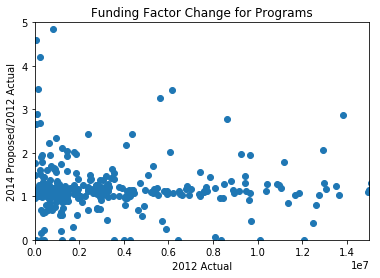

In [124]:
plt.scatter(seattleexp['2012 Actual'], (seattleexp['2014 Proposed']/seattleexp['2012 Actual']))
plt.title('Funding Factor Change for Programs')
plt.xlabel('2012 Actual')
plt.ylim((0, 5))
plt.xlim((0, 15000000))
plt.ylabel('2014 Proposed/2012 Actual')
plt.show()

The axes limits of this chart have been adjusted to prevent outliers from blurring the real message here.  There seems to be a weak relationship between absolute budget and its relative increase.

### What is the shape of the budget distribution at the program level?

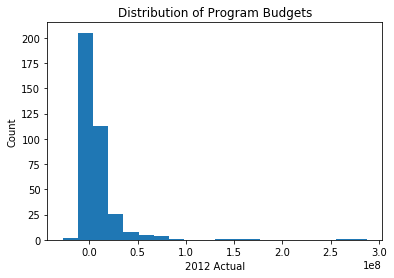

In [129]:
plt.hist(seattleexp['2012 Actual'], bins = 20)
plt.title('Distribution of Program Budgets')
plt.ylabel('Count')
plt.xlabel('2012 Actual')
plt.show()

It seems that the distribution is heavily right skewed.  This is not what I was expecting.  The distribution is somewhat similar to income distribution.  I wonder if this is a coincidence?